<font color='DarkBlue' size=+2><b>Комментарий ревьюера</b></font><br>
<font color='DarkBlue'>Привет, Павел! <br>Меня зовут Олег Мазуренко, и я буду проверять этот проект. Спасибо за проделанную работу! <br>Ко мне можно обращаться на «ты». Как мне обращаться, напиши.</font><br>
<font color='DarkBlue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font><br>
<font color='DarkBlue'>Синий текст &mdash; просто текст комментария.</font><br>
<font color='DarkGreen'>👌 Зеленый текст &mdash; все отлично.</font><br>
<font color='DarkMagenta'>👉 Фиолетовый текст &mdash; сделано все правильно, однако есть рекомендации, на что стоит обратить внимание. Реализованные рекомендации позволят нам наработать опыт решения задачи разными способами или посмотреть на задачу под иным углом.</font><br>
<font color='Red'>🛠 Красный текст &mdash; есть недочеты, они иногда бывают. </font><br><font color='DarkBlue'>Любая ошибка это возможность посмотреть на задачу с другой стороны и освоить новые знания, по этому не надо расстраиваться, если они есть.</font><br>
<font color='DarkBlue'>Обращаю внимание, что комментарии ревьюера после проверки удалять нельзя они помогают отследить логику исправления или изменения проекта. Это дополнительный навык при обучении. Свой исправляемый код лучше тоже не удалять, а ремить #, это позволит акцентировать изменения в ходе подготовки окончательного варианта проекта.<br>
Ответы на мои комментарии лучше тоже помечать. 
Например: </font><font color='Blue'><b>Комментарий студента</b></font><br>
<font color='DarkBlue'><b>Теперь посмотрим, что получилось!</b></font>

# Изучение рынка заведений общественного питания Москвы

- Автор:Бутаков Павел Викторович
- Дата: 09.05.25

### Цели и задачи проекта

Провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

### Описание данных

Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым
- seats — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- price — категория цен в заведении;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино».

### Содержимое проекта

1) Шаг 1. Загрузка данных и знакомство с ними

2) Шаг 2. Предобработка данных

3) Шаг 3. Исследовательский анализ данных

4) Шаг 4. Итоговый вывод и рекомендации


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.9 MB/s eta 0:00:01


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что инсталлируем библиотеку `phik`.</font>

In [2]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [3]:
# Выгружаем данные в переменные rest_info и rest_price
info_df = pd.read_csv('/datasets/rest_info.csv')
price_df = pd.read_csv('/datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
# Выводим первые строки датафрейма `rest_info` на экран
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме `rest_info`
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [6]:
# Выводим первые строки датафрейма `rest_price` на экран
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме `rest_price`
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

1) Объём данных:
`rest_info`: 8406 заведений, `rest_price`: 4058 (много пропущенных цен).

2) Пропуски:
`rest_info`: hours (536), seats (3611).

`rest_price`: price (743), avg_bill (242), middle_coffee_cup (87% пропусков).

3)Проблемы:

Текстовые форматы: время работы, средний счёт ("1000–1600 ₽"), категории цен.

`seats` и `middle_coffee_cup` частично заполнены.

4)Действия:

Чистка пропусков, извлечение чисел из текста, преобразование времени работы, проверка связи таблиц по id.

Промежуточный вывод: Данные требуют предобработки, но пригодны для анализа.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исследовали общую информацию о датасетах и сделали промежуточные выводы.</font>

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
# Объединение по id с левым соединением
rest_df = pd.merge(info_df, price_df, on='id', how='left')

In [9]:
# Проверка размера
print(f"Размер объединенного датафрейма: {rest_df.shape}")
display(rest_df.head(2))

Размер объединенного датафрейма: (8406, 13)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно объединили датасеты в одну таблицу, проверили результат.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Лучше перед обработкой данных делать контроль размера датасета до и после обработки. Примерно вот так:</font>

In [10]:
# Комментарий ревьюера
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = rest_df.copy() 
len(temp)

8406

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [11]:
# Проверка типов данных
print("Типы данных до преобразования:")
display(rest_df.dtypes)

Типы данных до преобразования:


id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

In [12]:
# Преобразуем столбцы с числовыми значениями
rest_df['rating'] = rest_df['rating'].astype(float)
rest_df['chain'] = rest_df['chain'].astype(int)
rest_df['seats'] = rest_df['seats'].astype(pd.Int64Dtype())
rest_df['middle_avg_bill'] = rest_df['middle_avg_bill'].astype(float)

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не обоснованное уничтожение данных в столбце `avg_bill`. Данный код преобразует только строки содержащие символы `от`, а их в датасете всего 361 (см.код ниже). В итоге, все остальные значения были пробразованы в пропуски, таким образом уничтожено 3451 строка данных.</font>
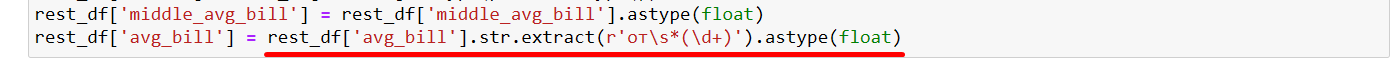

<div class="alert alert-info">
    
Комментарий студента:
    Попытался исправить, добавив функцию для извлечения числа(нашёл подобную в интернете), но всё равно до конца не понимаю, как это работает и как правильно нужно исправить

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Зачем модифицировать данные этого столбца? Разве в брифе требуется его анализировать? Предобработка данных предназначена для их подготовки для реализации целей проекта. И обрабатываем те данные, которые необходимо анализировать. А вот неправильным кодом уничтожать данные нельзя.</font>

<div class="alert alert-info">
    
Комментарий студента 2: Я перепробовал много разного, но решил просто не трогать `avg_bilL`

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 И это правильно.</font>

In [13]:
# Комментарий ревьюера
print(f"Количество строк в исходном датасете, содержащих символы 'от': {temp.avg_bill.str.contains('от', na=False).sum()}")
print(f"Количество пропусков в исходном датасете в столбце 'avg_bill': {temp.avg_bill.isna().sum()}")
print(f"Количество пропусков в столбце 'avg_bill' после преобразования: {rest_df.avg_bill.isna().sum()}")

Количество строк в исходном датасете, содержащих символы 'от': 361
Количество пропусков в исходном датасете в столбце 'avg_bill': 4590
Количество пропусков в столбце 'avg_bill' после преобразования: 4590


In [14]:
print("Типы данных после преобразования seats:")
display(rest_df.dtypes)

Типы данных после преобразования seats:


id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Можно понизить разрядность числовых данных с 64 до 32, примерно вот так:<br>
`for column in ['rating','middle_avg_bill','middle_coffee_cup','seats']:`<br>
&nbsp;&nbsp;&nbsp;&nbsp;`df[column] = pd.to_numeric(df[column], downcast='float')`</font>

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [15]:
# Подсчёт абсолютных и относительных пропусков
missing = rest_df.isna().sum()
missing_percent = (rest_df.isna().mean() * 100).round(2)

# Объединяем в одну таблицу
missing_df = pd.DataFrame({
    'Кол-во пропусков': missing,
    'Доля пропусков': missing_percent
})

# Отображаем только те столбцы, где есть пропуски
missing_df = missing_df[missing_df['Кол-во пропусков'] > 0]
missing_df

,Кол-во пропусков,Доля пропусков
hours,536,6.38
seats,3611,42.96
price,5091,60.56
avg_bill,4590,54.60
middle_avg_bill,5257,62.54
middle_coffee_cup,7871,93.64


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Для анализа необходимо вывести количество пропусков и в относительных значениях.</font>

<div class="alert alert-info">
    
Комментарий студента: Вывел количество пропусков и в относительных значений, но значение 100% пропусков в avg_bill меня пугает

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А кто вместо 54,6% пропусков сделал 100%? См.код ниже.</font>

<div class="alert alert-info">
    
Комментарий студента 2: Теперь 54,6% пропусков, я счастлив

In [16]:
# Комментарий ревьюера 2
import pandas as pd        # Импортируем билиотеку (вдруг она не установлена в окружении)
tmp = temp.copy()          # Делаем копию сохраненного датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
hours,536,0.063800
seats,3611,0.429600
price,5091,0.605600
avg_bill,4590,0.546000
middle_avg_bill,5257,0.625400
middle_coffee_cup,7871,0.936400


In [17]:
# Изучаем примеры строк с пропусками
rest_df[rest_df['avg_bill'].isna()].sample(5)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3307,b1b0bff8e1984941bff5be61e4e2ed15,Поесть мы любим больше чем,кафе,"Москва, Багратионовский проезд, 7, корп. 20В",Западный административный округ,NaN,4.5,0,<NA>,NaN,NaN,NaN,NaN
7265,8f3873355b2149648ae21b89777106d6,Cafe Vecher,кафе,"Москва, парк Братеевская набережная",Южный административный округ,"пн-чт 11:00–00:00; пт,сб 11:00–01:00; вс 11:00...",4.9,0,<NA>,NaN,NaN,NaN,NaN
1417,57ce40d2e0bd452e95f5ee0203ff6021,Pho29,ресторан,"Москва, улица Космонавта Волкова, 6А",Северный административный округ,"ежедневно, 11:00–22:00",4.3,0,180,NaN,NaN,NaN,NaN
6698,7fa12d63f8934aa986cbc01f64ecb78f,ПтиШу,кафе,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",4.0,1,<NA>,NaN,NaN,NaN,NaN
6889,56dbcd66d9dc45b3babd513b8a6b0238,TortBar.ru,кафе,"Москва, Профсоюзная улица, 45А",Юго-Западный административный округ,"ежедневно, 09:00–18:00",5.0,0,160,NaN,NaN,NaN,NaN


60.55 Процентов пропусков в `price` и в `middle_coffee_cup` 93.63% несильно страшно, потому что особой роли не играет на дальнейшие вычисления, а 100% в `avg_bill`.. не знаю, что с этим делать и нет предположений

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не проанализированы пропуски в датасете, не сделаны предположения об их причинах и предложений по обработке пропусков.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не сделан анализ пропусков, включая предположения об их причинах и нет предложений по их обработке.</font>

Возможные причины пропусков:

- `hours` - не все заведения указывают график работы в открытых источниках. Можно заполнить наиболее частым значением для каждого типа заведения (category). Время работы часто зависит от формата заведения (кафе, ресторан, бар).

- `seats` - Информация редко публикуется на сайтах заведений, особенно для небольших заведений. Можно использовать медиану по district или category. Количество мест коррелирует с районом и типом заведения.

- `price`  - Многие заведения не публикуют прайсы в открытом доступе. Оставляем как есть. Удалить столбец, если он не используется в анализе. Высокий % пропусков делает заполнение ненадёжным.

- `avg_bill` - Данные могли быть собраны только из описаний с ключевой фразой «Средний счёт». Для анализа использовать middle_avg_bill, где данные уже нормализованы. Прямое заполнение невозможно из-за текстового формата исходных данных.

- `middle_avg_bill` и `middle_coffee_cup` - Значения заполняются только при наличии ключевых фраз в avg_bill. Для первого - Заменить пропуски на медиану по category + chain. Сетевые заведения одной категории имеют схожие ценовые характеристики. А для middle_coffee_cup удалить столбец из анализа. 93% пропусков делают любые выводы ненадёжными.

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<div class="alert alert-info">
    
Комментарий студента: Пропуски в датасете имеются, но с avg_bill я не знаю, что делать

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Об этом написано выше еще на первом ревью.</font><br>
<font color='DarkMagenta'>👉 Хочу обратить внимание, что если возникают трудности с выполнением проекта, то следует за помощью обращаться к насавнику. Формат ревью проекта не предполагает интерактивной коммуникации.</font>

<div class="alert alert-info">
    
Комментарий студента 2: Сделал более тщательный анализ пропусков, сделал предположения и предложения по их обработке

In [18]:
# Проверка количества посадочных мест
len(temp[temp['seats'] == 0])

136

In [19]:
#Создаем копию данных для безопасности
rest_df_clean = rest_df.copy()

# Для seats (количество мест не может быть отрицательным)
rest_df_clean['seats'] = rest_df_clean['seats'].fillna(-1)  # Int64 поддерживает отрицательные числа

# Для middle_avg_bill (средний чек не может быть отрицательным или нулевым)
rest_df_clean['middle_avg_bill'] = rest_df_clean['middle_avg_bill'].fillna(-999).astype('float32')

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Перед заменой пропуков заглушкой (значением-индикатором) необходимо проверить наличие таких значений в датасете, а такие значения в количестве посадочных мест есть (см.код ниже). Заглушка должна находится вне допустимых значений столбца, в котором производится замена пропусков.</font><br>
<font color='DarkMagenta'>👉 Допустимая замена пропусков заглушками (значением-индикатором). Только при анализе заглушки надо будет отфильтровывать.</font><br>
<font color='DarkMagenta'>👉 Но надо иметь в виду, что правильно построить матрицу корреляции по столбцам с заглушками не удастся, так как заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбцах. По этому в этой задаче необходимо будет обратно заменить заглушки на пропуски, пропуски не мешают расчету корреляции и анализу.</font>
<br><font color='DarkMagenta'>👉 Не понятно, какие пропуски удаляются из столбца рейтинга, по анализу выше показано, что там их нет.</font>

<div class="alert alert-info">
    
Комментарий студента: попытался исправить, но до конца всё равно не понимаю, очень нужно наглядное пояснение :)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Еще раз повторяю, что нельзя пропуски заменять значениями, которые уже есть в данных. Заглушка (значение-индикатор) не должна входить в диапазон допустимых значений данных столбца. </font>
<br><font color='DarkMagenta'>👉 Наглядные пояснения необходимо получать у наставника.</font>

<div class="alert alert-info">
    
Комментарий студента 2: В этот раз исправился

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkMagenta'>👉 Чем пропуски в этих столбцах мешают анализу? А вот заглушки будут мешать.<br>И какой смысл ставить заглушки в датасете `rest_df_clean`, если он нигде больше не используется?</font>

In [20]:
# Комментарий ревьюера
len(temp[temp['seats'] == 0])

136

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало проверить уникальные значения в категориальных столбцах до их преобразования.</font>

In [21]:
# Нормализация названий и адресов
rest_df['name_norm'] = rest_df['name'].str.lower().str.strip()
rest_df['address_norm'] = rest_df['address'].str.lower().str.strip()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, привели к одному регистру названия заведений и адреса, удалили конечные пробелы.</font>
<br><font color='DarkMagenta'>👉 Только зачем для этого создавать лишние столбцы?</font>

In [22]:
# Поиск полных дубликатов
dups = rest_df.duplicated(subset=['name_norm', 'address_norm'])
rest_df[dups]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,name_norm,address_norm
215,897ddbc6746c4388b19dc8a9fcdbb488,Кафе,кафе,"Москва, парк Ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,<NA>,NaN,NaN,NaN,NaN,кафе,"москва, парк ангарские пруды"
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN,more poke,"москва, волоколамское шоссе, 11, стр. 2"
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN,раковарня клешни и хвосты,"москва, проспект мира, 118"
3109,d3116844e4e048f99614eb30be3214e0,Хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276,NaN,NaN,NaN,NaN,хлеб да выпечка,"москва, ярцевская улица, 19"


In [23]:
# Удаление дубликатов
rest_df = rest_df[~dups]

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, обработали дубликаты.</font>

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [24]:
# Метка только для точного шаблона "ежедневно, круглосуточно"
rest_df['is_24_7'] = rest_df['hours'] == 'ежедневно, круглосуточно'

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильно создан столбец с бинарным признаком ежедневной и круглосуточной работы заведения и остальных, см.код ниже.</font>

In [25]:
# Комментарий ревьюера
# Проверим правильность категоризации
tmp0, col1 = rest_df.copy(), 'is_24_7'
a1 = len(tmp0[tmp0.hours != 'ежедневно, круглосуточно'])
a2 = len(tmp0[tmp0.hours == 'ежедневно, круглосуточно'])

print(" Количество не работающих ежедневно и круглосуточно", a1,
      '\n', "Количество работающих ежедневно и круглосуточно", a2,'\n')
print("Количество категорий полученное в проекте:")
tmp0[col1].value_counts()

 Количество не работающих ежедневно и круглосуточно 7672 
 Количество работающих ежедневно и круглосуточно 730 

Количество категорий полученное в проекте:


False    7672
True      730
Name: is_24_7, dtype: int64

In [26]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(rest_df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

In [27]:
# Объём данных до объединения
print(f"rest_info: {len(info_df)} заведений, rest_price: {len(price_df)} записей")

rest_info: 8406 заведений, rest_price: 4058 записей


In [28]:
# Пропуски в объединённом датафрейме
print(rest_df.isna().sum())

id                      0
name                    0
category                0
address                 0
district                0
hours                 535
rating                  0
chain                   0
seats                3610
price                5087
avg_bill             4586
middle_avg_bill      5253
middle_coffee_cup    7867
name_norm               0
address_norm            0
is_24_7                 0
dtype: int64


Вывод: 

1)Объём данных: `rest_info`: 8406 заведений, `rest_price`: 4058 записей (есть пропуски в ценах).

2)Пропуски: `hours`: 535, `seats`: 3610 `price`: 5087, `avg_bill`: 4586, `middle_coffee_cup`: 7867, `middle_avg_bill`: 5253

3)Действия: заполнили пропуски, преобразовали типы, нормализовали текст, удалили дубликаты, добавили признак 24/7.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали вывод по разделу предобработки данных. 👍</font>

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [29]:
# Абсолютные и относительные значения категорий
total = len(rest_df)
cat_counts = rest_df['category'].value_counts()
cat_rel = (cat_counts / total * 100).round(2)
pd.DataFrame({'Абсолютно': cat_counts, 'Относительно (%)': cat_rel})

,Абсолютно,Относительно (%)
кафе,2376,28.28
ресторан,2042,24.30
кофейня,1413,16.82
"бар,паб",764,9.09
пиццерия,633,7.53
быстрое питание,603,7.18
столовая,315,3.75
булочная,256,3.05


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Перед визуализацией необходимо провести анализ количества заведений общественного питания в абсолютных и относительных значениях. Примерно вот так: </font>
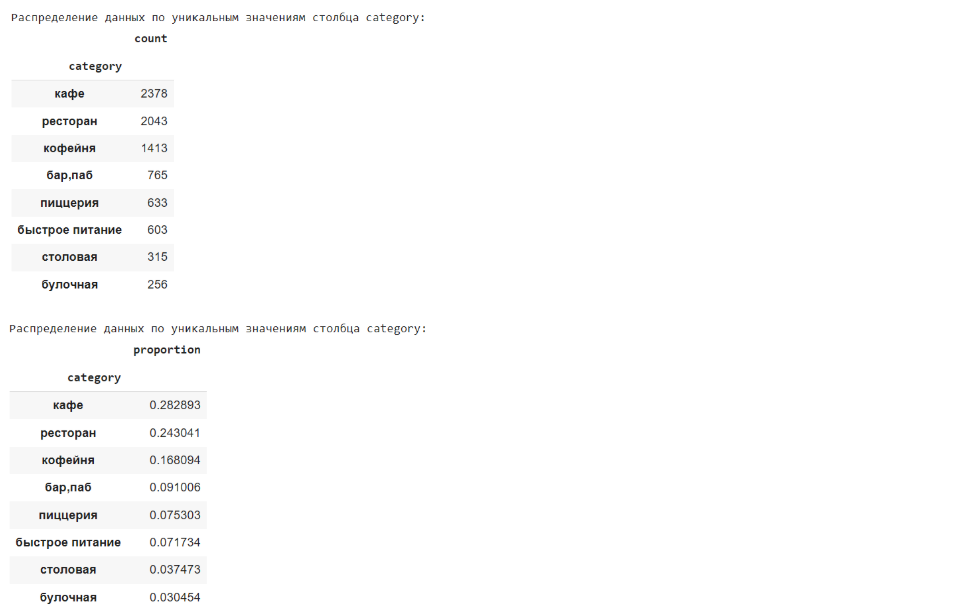

<div class="alert alert-info">

Комментарий студента: Добавил анализ количества заведений в абсолютных и относительных значениях

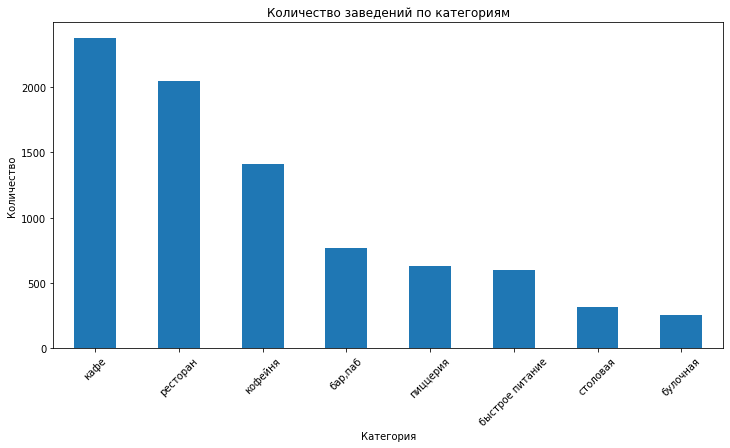

In [30]:
cat_counts = rest_df['category'].value_counts()
plt.figure(figsize=(12,6))
cat_counts.plot(kind='bar')
plt.title('Количество заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошая визуализация и правильно, что оси подписаны и есть название графика.</font>

Вывод: наиболее часто встречаются кафе и рестораны.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [31]:
# Абсолютные и относительные по районам
dist_counts = rest_df['district'].value_counts()
dist_rel = (dist_counts / total * 100).round(2)
pd.DataFrame({'Абсолютно': dist_counts, 'Относительно (%)': dist_rel})

,Абсолютно,Относительно (%)
Центральный административный округ,2242,26.68
Северный административный округ,898,10.69
Южный административный округ,892,10.62
Северо-Восточный административный округ,890,10.59
Западный административный округ,850,10.12
Восточный административный округ,798,9.50
Юго-Восточный административный округ,714,8.50
Юго-Западный административный округ,709,8.44
Северо-Западный административный округ,409,4.87


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Перед визуализацией необходимо провести анализ количества заведений по административным районам в абсолютных и относительных значениях. Примерно вот так: </font>
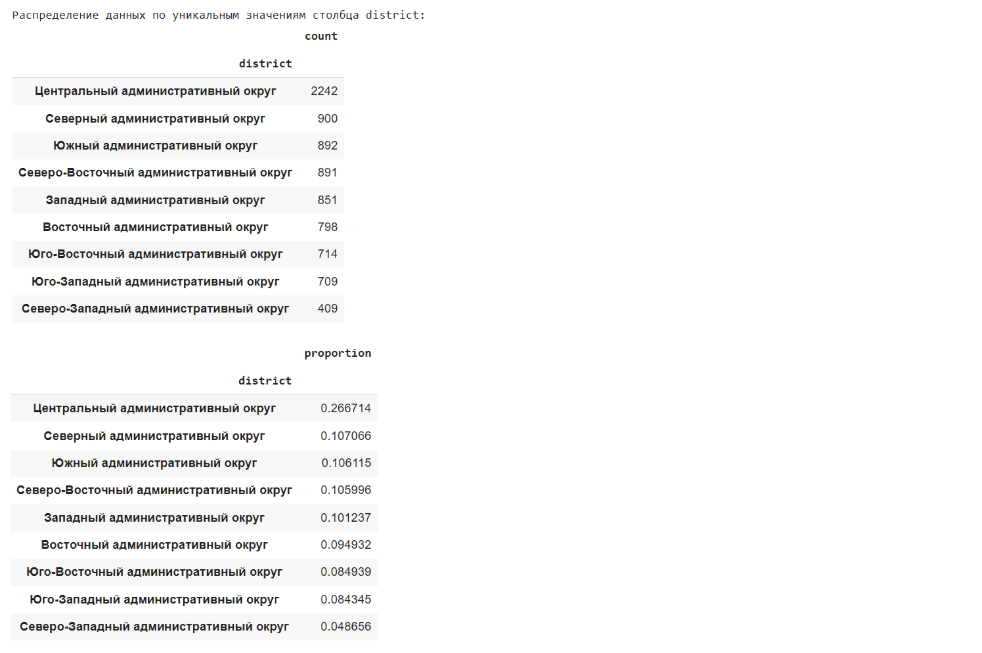

<div class="alert alert-info">

Комментарий студента: Добавил анализ количества заведений в абсолютных и относительных значениях

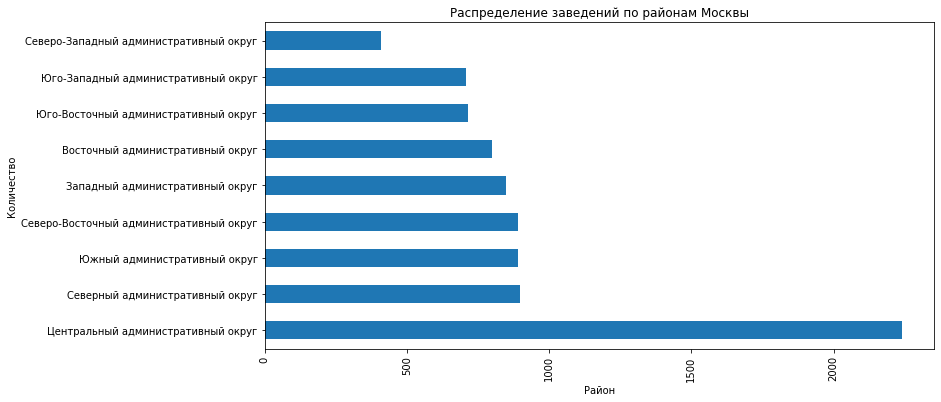

In [32]:
district_counts = rest_df['district'].value_counts()
plt.figure(figsize=(12,6))
district_counts.plot(kind='barh')
plt.title('Распределение заведений по районам Москвы')
plt.xlabel('Район')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало использовать столбчатую диаграмму с горизонтальным расположением, так как метки по районам очень длинные, примерно вот так:</font>
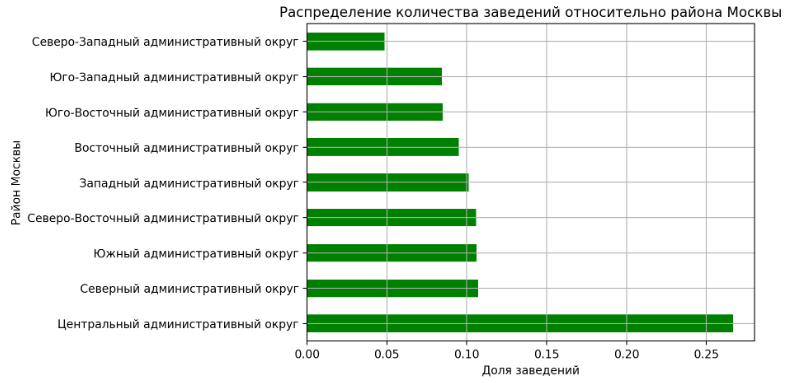

Исходя из полученных данных, можно сделать вывод, что самая большая доля заведений приходится на ЦАО, а именно 26,68%, а в СЗАО всего 4.87%, что является довольно маленьких количеством

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Анализ должен заканчиваться промежуточным выводом с описанием полученных результатов по административным округам.</font>

<div class="alert alert-info">

Комментарий студента: Добавил промежуточный вывод с описанием полученных результатов по административным округам

In [33]:
cao = rest_df[rest_df['district']=='Центральный административный округ']
cao_counts = cao['category'].value_counts()
cao_rel = (cao_counts / len(cao) * 100).round(2)
pd.DataFrame({'Абсолютно': cao_counts, 'Относительно (%)': cao_rel})

,Абсолютно,Относительно (%)
ресторан,670,29.88
кафе,464,20.70
кофейня,428,19.09
"бар,паб",364,16.24
пиццерия,113,5.04
быстрое питание,87,3.88
столовая,66,2.94
булочная,50,2.23


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 И здесь перед визуализацией необходимо провести анализ количества заведений по ЦАО в абсолютных и относительных значениях.</font>

<div class="alert alert-info">

Комментарий студента: Добавил анализ количества заведений в абсолютных и относительных значениях

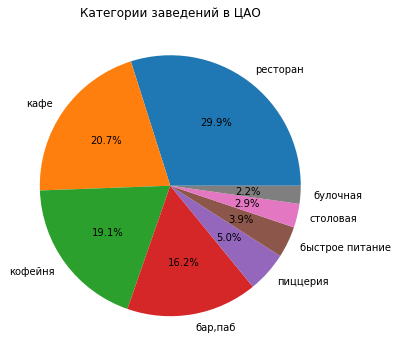

In [34]:
cao = rest_df[rest_df['district'] == 'Центральный административный округ']
plt.figure(figsize=(6,6))
cao['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Категории заведений в ЦАО')
plt.ylabel('')
plt.show()

Вывод: большинство заведений в ЦАО составляет рестораны, кафе и кофейни - 29,9%, 20,7% и 19,1% соответственно, в то время как булочные и столовые вместе составляют менее 5% заведений

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Анализ следует завершать промежуточным выводом с описанием распределения категорий заведений в ЦАО.</font>

<div class="alert alert-info">

Комментарий студента: Исправил промежуточный вывод с описанием распределения категорий заведений в ЦАО.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [35]:
# Абсолютные и относительные
total_chains = rest_df['chain'].value_counts()
total_chains_rel = (total_chains / total * 100).round(2)
pd.DataFrame({'Абсолютно': total_chains, 'Относительно (%)': total_chains_rel})

,Абсолютно,Относительно (%)
0,5199,61.88
1,3203,38.12


Text(0, 0.5, '')

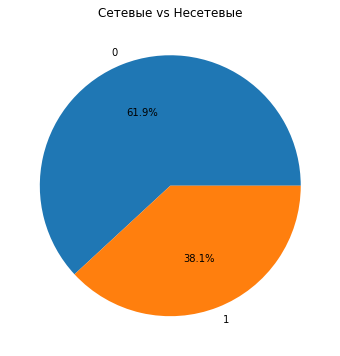

In [36]:
# Визуализация общего
total_chains_rel.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Сетевые vs Несетевые')
plt.ylabel('')

Вывод: 
Несетевых заведений больше сетевых, что может нам говорить об их популярности. При всём при этом, количество сетевых заведений будет расти, поэтому ставку можно сделать на этом

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что проанализировали сетевые и не сетевые заведения в относительных значениях.</font>

<div class="alert alert-info">

Комментарий студента: Добавил вывод сетевых/не сетевых заведений

In [37]:
# Доля сетевых по категориям
chain_by_cat = rest_df.groupby('category')['chain'].mean().sort_values(ascending=False)
chain_by_cat_rel = (chain_by_cat * 100).round(2)
pd.DataFrame({'Доля сетевых (%)': chain_by_cat_rel})

,Доля сетевых (%)
category,
булочная,61.33
пиццерия,52.13
кофейня,50.96
быстрое питание,38.47
ресторан,35.70
кафе,32.79
столовая,27.94
"бар,паб",21.99


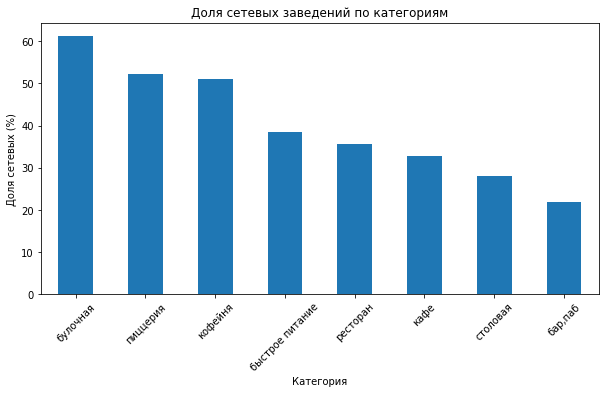

In [38]:
# Визуализация по категориям
plt.figure(figsize=(10,5))
chain_by_cat_rel.plot(kind='bar')
plt.title('Доля сетевых заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Доля сетевых (%)')
plt.xticks(rotation=45);

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Правильное решение.</font>

Вывод: доля сетевых заведений выше 50% среди булочных, пиццерий и кофейн.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В задании сформулирован вопрос: `Какие категории заведений чаще являются сетевыми?`. Поэтому анализ необходимо проводить по долям категорий сетевых заведений. При визуализации следует сделать сортировку по значениям. Примерно вот так:</font>
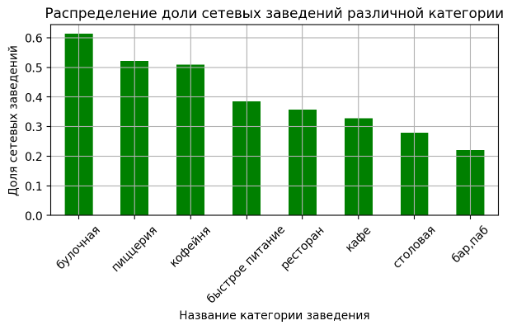

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Анализ сетевых/не сетевых заведений и категорий сетевых должен заканчиваться промежуточным выводом.</font>

<div class="alert alert-info">

Комментарий студента: Добавил вывод о доли сетевых заведений по категориям

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 В разделе предобработки данных на пропуски значений посадочных мест была поставлена заглушка, при анализе ее необходимо отфильтровывать, так как она искажает результаты анализа.</font><br>
<font color='Red'>🛠 Вот, что написано в задании: <br><b>Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны?</b> <br>Этот анализ необходимо сделать по всем заведениям, до анализа по категориям. Для этого следует использовать сводную статистику, гистограмму и диаграмму размаха по всем значениям посадочных мест без разбивки по категориям.</font>

In [39]:
# Оставляем только ненулевые реальные значения
seats = rest_df['seats'].dropna()
# Сводная статистика
seats.describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не отфильтрованы заглушки в столбце посадочных мест, см.код ниже.</font>

In [40]:
# Комментарий ревьюера 2
rest_df['seats'].value_counts()[:2]

40     253
100    213
Name: seats, dtype: Int64

Text(0, 0.5, 'Частота')

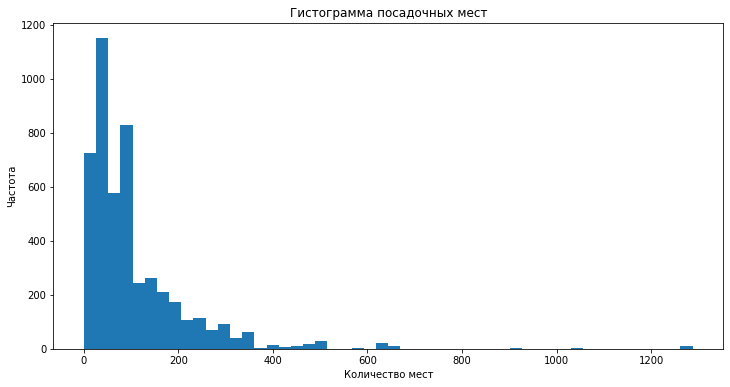

In [41]:
# Гистограмма и boxplot
plt.figure(figsize=(12,6))
plt.hist(seats, bins=50)
plt.title('Гистограмма посадочных мест')
plt.xlabel('Количество мест'); plt.ylabel('Частота')

Text(0.5, 0, 'Количество мест')

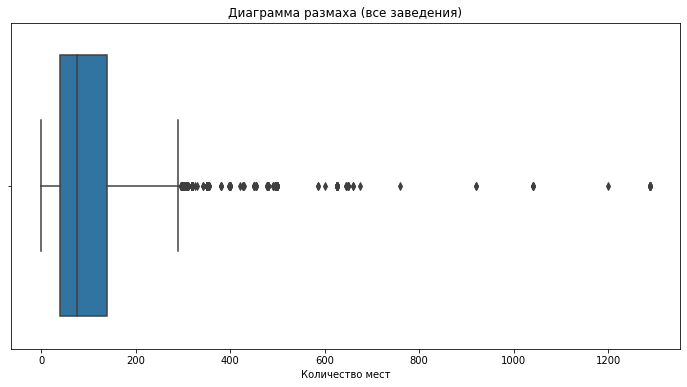

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=seats)
plt.title('Диаграмма размаха (все заведения)')
plt.xlabel('Количество мест')

In [43]:
# Типичное количество мест по категориям
seats_stats = rest_df.groupby('category')['seats'].agg(['mean','median']).sort_values('median')
seats_stats

,mean,median
category,,
булочная,89.385135,50.0
пиццерия,94.496487,55.0
кафе,97.365653,60.0
быстрое питание,98.891117,65.0
столовая,99.75,75.5
кофейня,111.199734,80.0
"бар,паб",124.477516,82.0
ресторан,121.892041,86.0


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Анализ должен визуализироваться, в первой версии проекта визуализация была, теперь ее нет.</font>
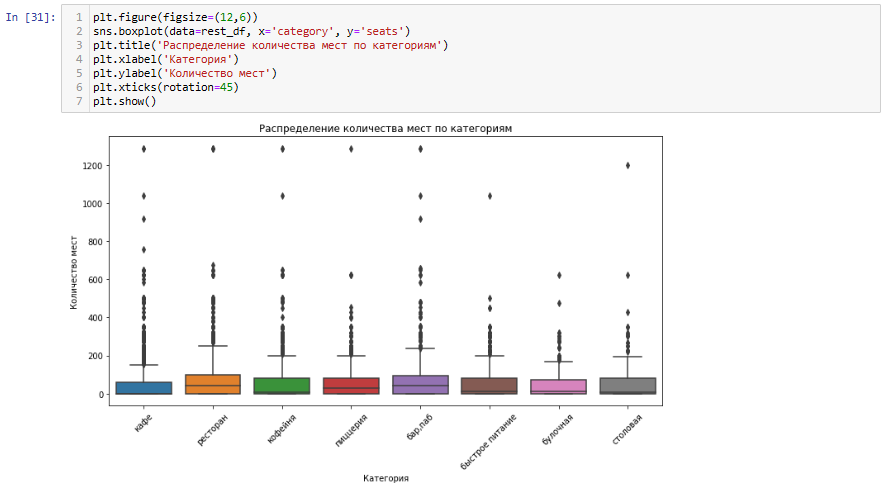

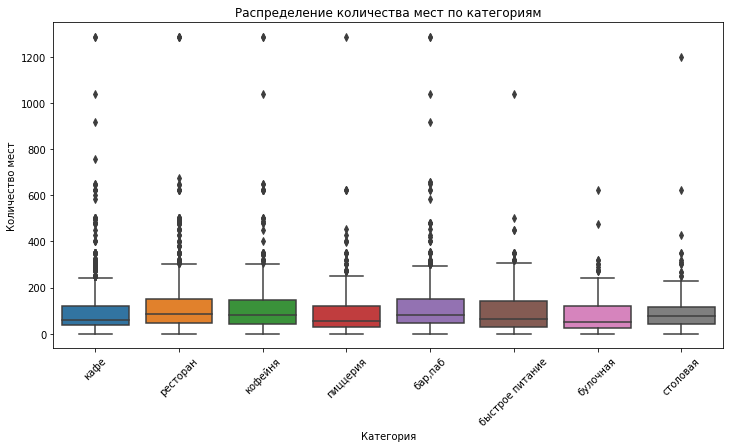

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data=rest_df, x='category', y='seats')
plt.title('Распределение количества мест по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

Вывод: Исходя из полученных данных можно смело сказать, что в среднем посадочных мест в заведениях около 50-90, но также бывают и уникальные случае, когда их количество выходит за 300. Также среднее значение во всех заведениях больше медианы, что явно говорит нам о выбросах, которые можно увидеть на "Распределение количества мест по категориям"

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Задание следует заканчивать расширенным обобщением результатов анализа.</font>

<div class="alert alert-info">

Комментарий студента: Добавил вывод о количестве посадочных мест в разных заведениях

<div class="alert alert-info">

Комментарий студента 2: Постарался исправить все замечания в задании, исправил значения в выводе.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [45]:
rest_df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [46]:
# Средний рейтинг по категориям
rating_by_cat = rest_df.groupby('category')['rating'].mean().sort_values(ascending=False)
rating_by_cat

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290402
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.124285
быстрое питание    4.050249
Name: rating, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Правильно было бы посмотреть сводную статистику рейтингов всех заведений общественного питания  методом `describe()`.</font>

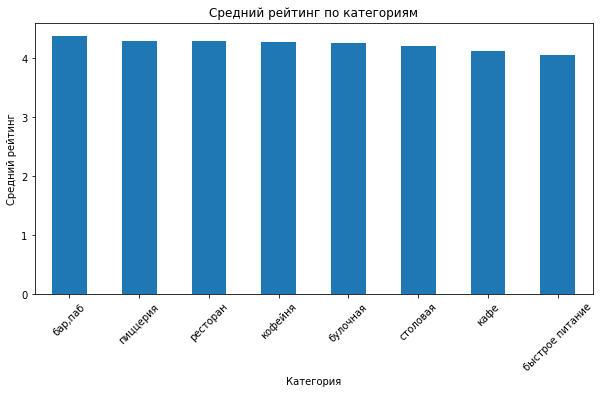

In [47]:
plt.figure(figsize=(10,5))
rating_by_cat.plot(kind='bar')
plt.title('Средний рейтинг по категориям')
plt.xlabel('Категория'); plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45);

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Не совсем корректная визуализация, в данных нет выбросов, все рейтинги находятся в допустимом диапазоне 1 - 5, а скрипичная диаграмма предназначена для анализа выбросов, распределения и аномалий. Следовало визуализировать столбчатыми диаграммами средние значения рейтингов, примерно вот так:</font>
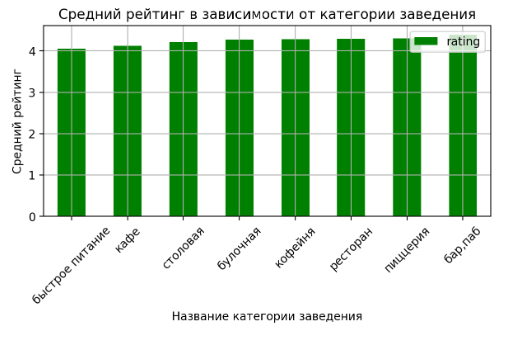

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Следовало проанализировать вариации средних рейтингов по категориям заведений, для этого следует использовать метод `.describe()`. Примерно вот так:</font>
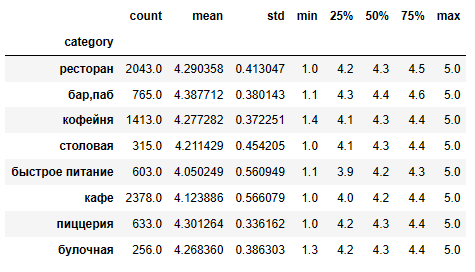

Вывод: Средний рейтинг во всех заведениях примерно одинаковый, что говорит нам о популярности всех заведений, но при этом  явно можно выделить бар.паб у которого рейтинг 4,39, а меньше всего у быстрого питания - 4,05

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Выполненный анализ должен заканчиваться расширенным обобщением результатов.</font>

<div class="alert alert-info">

Комментарий студента: Добавил вывод о среднем рейтинге заведений

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font>
<br><font color='Red'>🛠 В разделе предобработки на пропуски в данных по количеству посадочных мест была поставлена заглушка 0 (см.код ниже) и расчет корреляции проводится с ней, соответственно, является не валидным. Но просто отфильтровать заглушки по посадочным местам нельзя, так будут одновременно удалены значимые данные по другим столбцам датасета и опять получим невалидный анализ.</font>

In [48]:
# Убрали заглушки
rest_df['seats'].value_counts()[:2]

40     253
100    213
Name: seats, dtype: Int64

In [49]:
# Подготовка категорий для phik
corr_df = rest_df[['rating','category','district','chain','seats', 'price' ,'is_24_7']].copy()
corr_df['category'] = corr_df['category'].astype('category')
corr_df['district'] = corr_df['district'].astype('category')
corr_df['is_24_7'] = corr_df['is_24_7'].astype(int)

In [50]:
# Расчет phi_k
phi_k_matrix = phik_matrix(corr_df)
phi_k_matrix

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']


,rating,category,district,chain,seats,price,is_24_7
rating,1.000000,0.189716,0.200761,0.107833,0.000000,0.220295,0.150365
category,0.189716,1.000000,0.174584,0.266000,0.048923,0.566933,0.244815
district,0.200761,0.174584,1.000000,0.064473,0.352440,0.202787,0.076357
chain,0.107833,0.266000,0.064473,1.000000,0.056523,0.218211,0.043488
seats,0.000000,0.048923,0.352440,0.056523,1.000000,0.088146,0.043193
price,0.220295,0.566933,0.202787,0.218211,0.088146,1.000000,0.084183
is_24_7,0.150365,0.244815,0.076357,0.043488,0.043193,0.084183,1.000000


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Корреляция Пирсона не предназначена для анализа категориальных данных и расчета взаимозависимости между числовыми и категориальными данными. Кодирование числами категориальных данных не делает их числовыми. Для таких данных следует использовать универсальный коэффициент `phi_k` и метод его расчета `phik_matrix()`.</font><br>
<font color='Red'>🛠 В задании прямо указано по каким признакам строить корреляционную матрицу. Здесь в расчет включены не все признаки. Названия столбцов содержащих признаки, которые необходимо анализировать: `'category','district', 'rating', 'chain', 'seats', 'price', 'is_24/7'`.</font><br>
<font color='Red'>🛠 В данном задании для анализа корреляции рейтингов заведений должен использоваться коэффициент `phi_k`  и метод его расчета `phik_matrix()`.</font>
<br><font color='DarkMagenta'>👉 Вот обоснование его использование из курса:<br>
В Python существует специальная библиотека, которая предлагает универсальный метод, чтобы рассчитать предполагаемую зависимость между переменными разных типов. Этот универсальный коэффициент особенно полезен, когда необходимо оценить связь как между числовыми, так и между категориальными переменными. В таких случаях стандартные методы, такие как Пирсона или Спирмена, могут не подойти.<br>
Речь идёт о коэффициенте `phi_k` из библиотеки `phik`. Он измеряет степень отличия связи между переменными от случая независимости.<br>
Коэффициент `phi_k` разработан как обобщение для разных типов данных. Он анализирует, насколько сильно две переменные связаны, независимо от их природы: числовые, категориальные и даже смешанные. Коэффициент поможет определить как линейные, так и нелинейные зависимости, поэтому его можно гибко применять.<br>
Для работы чаще всего используется метод `phik_matrix()`, который автоматически рассчитывает коэффициенты корреляции `phi_k` между всеми парами переменных датафрейма.</font>

Text(0.5, 1.0, 'Phi_k корреляции')

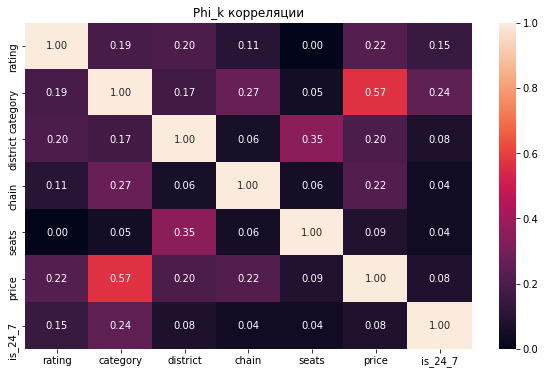

In [51]:
# Визуализация phi_k матрицы
plt.figure(figsize=(10,6))
sns.heatmap(phi_k_matrix, annot=True, fmt='.2f')
plt.title('Phi_k корреляции')

Вывод: сильнее всего связь между `rating` и `price` - 0,22, что может нам напрямую говорить о том, что от рейтинга заведения сильно зависит и его цена и наоборот, что вполне является логичным - лучше условия и еда, значит лучше рейтинг, значит выше средний чек.

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Где в задании написано делать расчет корреляции по столбцу `avg_bill`? <br>Я еще на первом ревью специально перечислил имена столбцов для расчета корреляции. На втором ревью еще раз это повторил.</font>
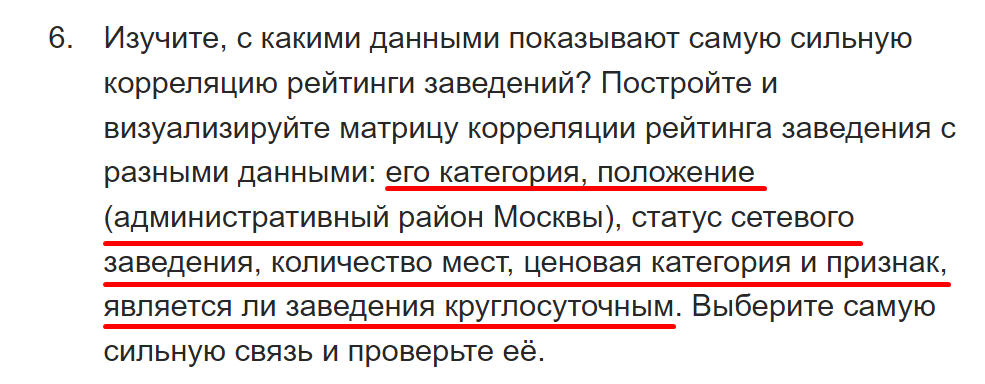
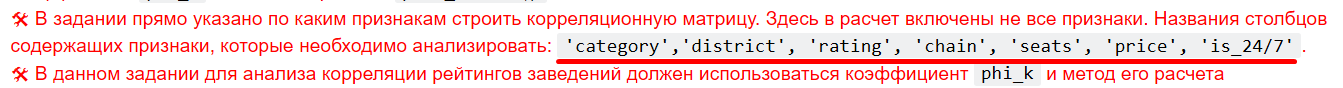

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='Red'>🛠 Причем тут связь между `category` и другими признаками? Определять необходимо связь между рейтингом и шестью признаками, указанными в задании. Затем необходимо сделать анализ самой сильной связи и визуализировать его.</font>

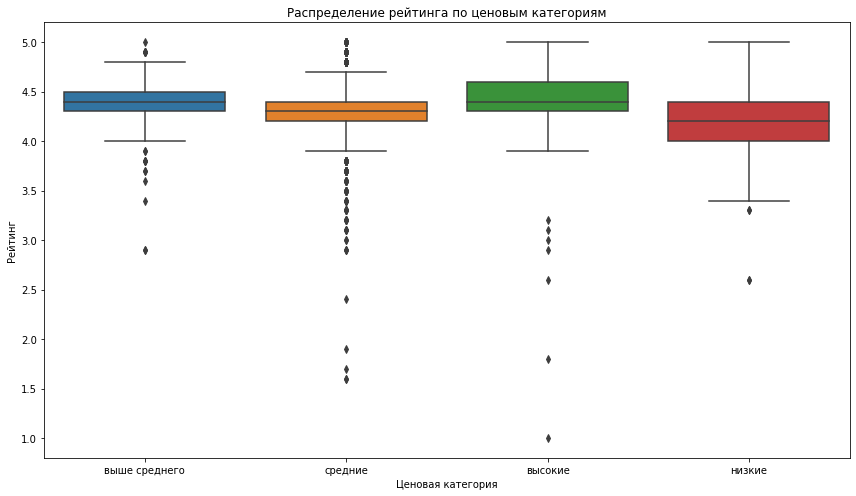

In [52]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=rest_df,
    x='price',
    y='rating',
)
plt.title('Распределение рейтинга по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг')
plt.tight_layout()
plt.show()


<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkMagenta'>👉 Не корректная визуализация, в данных нет выбросов, все рейтинги находятся в допустимом диапазоне 1 - 5, а диаграмма размаха предназначена для анализа выбросов, распределения и аномалий. Следовало визуализировать столбчатыми диаграммами средние значения рейтингов, как это сделано ниже.</font>

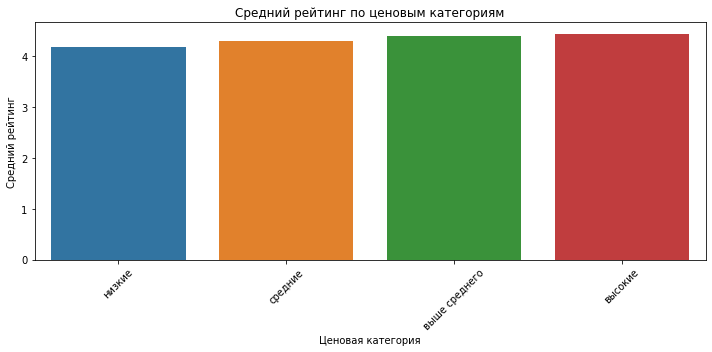

In [53]:
price_rating = rest_df.groupby('price')['rating'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=price_rating.index, y=price_rating.values)
plt.title('Средний рейтинг по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не правильный расчет корреляции, не правильно установлена самая сильная взимосвязь. Не обходимо переделать весь этот раздел.</font>

Вывод: 

- Тенденция роста рейтинга с увеличением ценовой категории.

У заведений в категории «высокие» медианный рейтинг выше всего (≈ 4,4 – 4,5), у «выше среднего» чуть ниже (≈ 4,3 – 4,4), у «средних» около 4,25, у «низких» — самое низкое значение (≈ 4,1 – 4,2).

То есть более дорогие заведения в среднем получают чуть более высокие оценки посетителей.

- Ширина разброса и выбросы.

В дешёвых категориях («низкие», «средние») диапазон рейтингов шире, присутствует больше низких оценок (2–3 балла) и выбросов.

В дорогих («высокие») разброс уже: большинство заведений удерживаются в узком коридоре 4,0–5,0.

- Степень связи — слабая.

Связь 0,22 говорит о слабой положительной связи между ценовой категорией и рейтингом.

Это означает, что хотя средний чек влияет на оценку, этот фактор не является решающим: на рейтинг сильнее могут влиять сервис, атмосфера, меню и прочие атрибуты.

<font color='DarkBlue'><b>Комментарий ревьюера 5</b></font><br>
<font color='DarkMagenta'>👉 Обращаю внимание, что метод `phik_matrix()` из библиотеки `phik` не определяет положительную или отрицательную корреляцию, он только измеряет степень отличия связи между переменными от случая независимости. По этому и делаем дальнейший анализ этой взаимосвязи.</font>
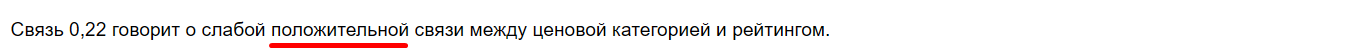

<div class="alert alert-info">

Комментарий студента: Исправил расчёт корреляции, найдена другая самая сильная взаимосвязь

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибки не исправлены. Расчет корреляции проводиться с заглушкой, расчет проводиться не по всем признакам, указанным в задании.</font>
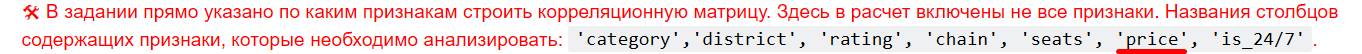
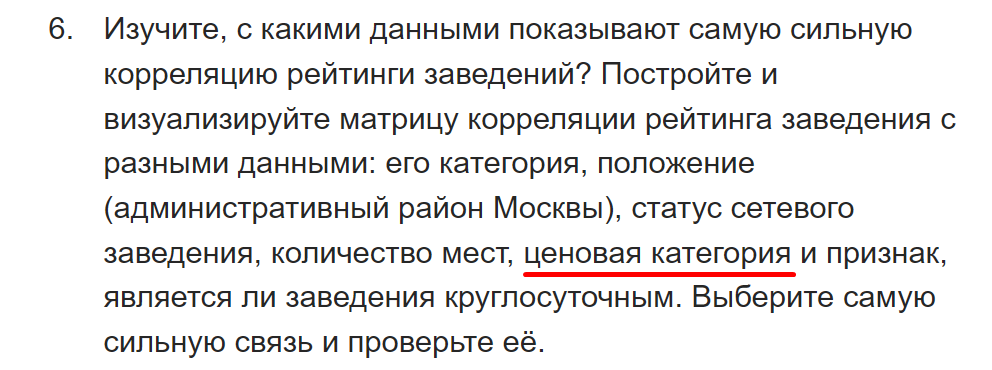

<div class="alert alert-info">

Комментарий студента 2: Исправил расчёт корреляции, переделаны выводы.

<div class="alert alert-info">

Комментарий студента 3: Исправил анализ самой сильной связи в корреляции, добавил соответствующие визуализации, сделал краткий вывод.

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='Red'>🛠 Сделать анализ между рейтингом и категорией с самой сильной связью, визуализировать анализ и написать выводы.</font>

<div class="alert alert-info">

Комментарий студента 4: Исправил анализ самой сильной связи в корреляции, оформил вывод исходя из визуализаций.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [54]:
# Подсчет топ-15 по name+category
chain_df = rest_df[rest_df['chain']==1]
top_chains = (chain_df.groupby(['name','category'])
              .agg(count=('id','count'), avg_rating=('rating','mean'))
              .sort_values('count', ascending=False)
              .head(15)
              .reset_index())
top_chains

,name,category,count,avg_rating
0,Шоколадница,кофейня,119,4.178151
1,Домино'с Пицца,пиццерия,76,4.169737
2,Додо Пицца,пиццерия,74,4.286486
3,One Price Coffee,кофейня,71,4.064789
4,Яндекс Лавка,ресторан,69,3.872464
5,Cofix,кофейня,65,4.075385
6,Prime,ресторан,49,4.114286
7,КОФЕПОРТ,кофейня,42,4.147619
8,Кулинарная лавка братьев Караваевых,кафе,39,4.394872
9,Теремок,ресторан,36,4.105556


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Хочу обратить внимание, что код выше не совсем корректен, так как группировка проводится только по имени заведения, а должна по имени и категории. В итоге, в таблицу попадают заведения, которые имеют несколько категорий, см.код ниже. На скрине таблица топ-15 сгруппированная одновременно по имени и категории.</font>
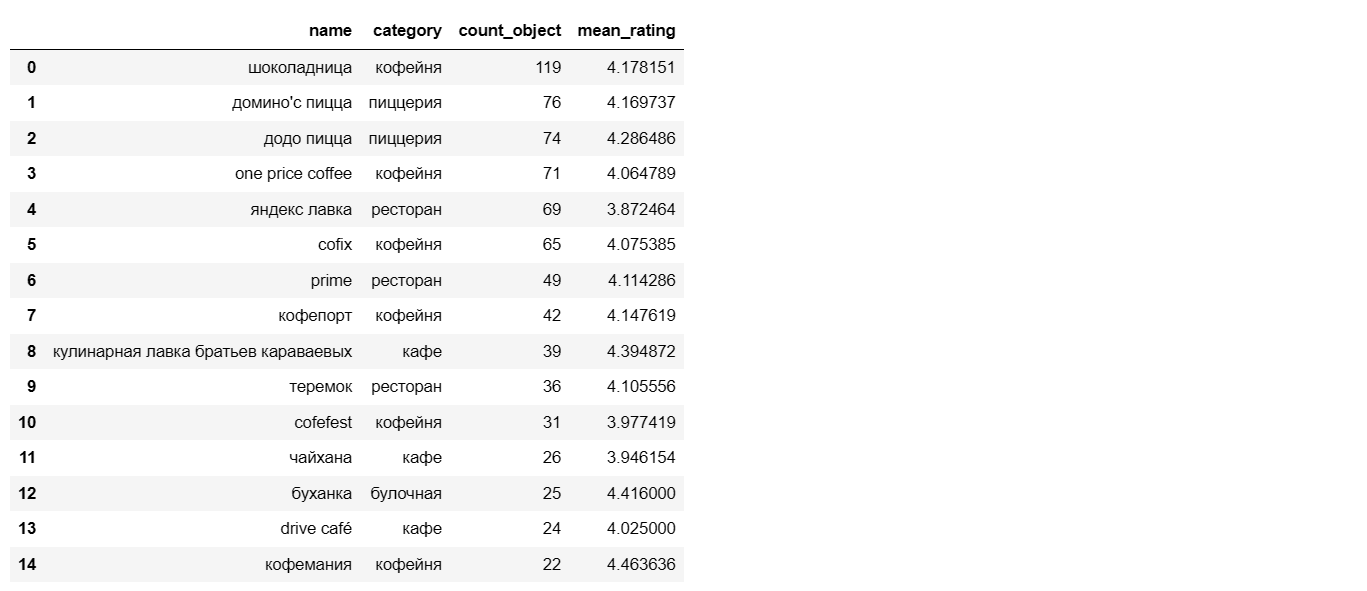

In [55]:
# Комментарий ревьюера
tmp = rest_df.copy()          # создаем копию текущего датасета
name_tmp = 'му-му'       # задаем имя столбца для проверки уникальных категорий
print(f'Заведения с одинаковым именем {name_tmp} относятся к разным категориям:\n\
{", ".join(tmp[tmp.name_norm == name_tmp].category.unique())}')

Заведения с одинаковым именем му-му относятся к разным категориям:
кафе, ресторан, кофейня, быстрое питание, пиццерия, столовая, бар,паб


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Нет визуализации количества и средних рейтингов топ-15 сетевых заведений, что требуется в задании.</font>

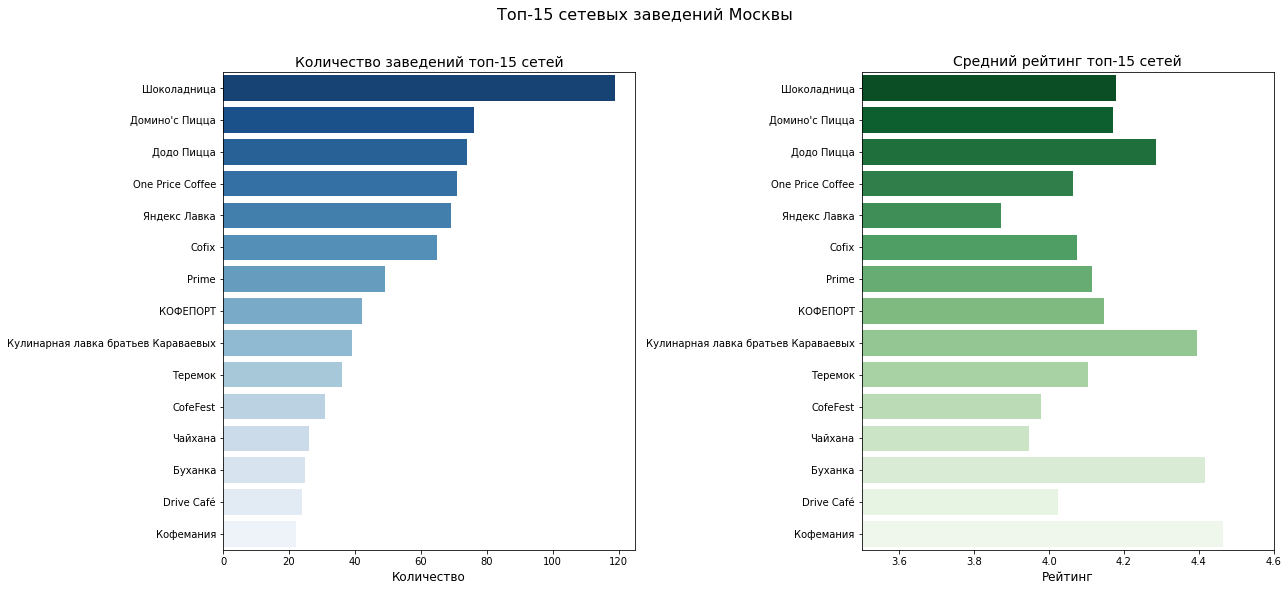

In [56]:
# Создаем фигуру с двумя субплoтами
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# График количества заведений
sns.barplot(
    data=top_chains,
    y='name',
    x='count',
    ax=ax1,
    palette='Blues_r'
)
ax1.set_title('Количество заведений топ-15 сетей', fontsize=14)
ax1.set_xlabel('Количество', fontsize=12)
ax1.set_ylabel('')

# График среднего рейтинга
sns.barplot(
    data=top_chains,
    y='name',
    x='avg_rating',
    ax=ax2,
    palette='Greens_r'
)
ax2.set_title('Средний рейтинг топ-15 сетей', fontsize=14)
ax2.set_xlabel('Рейтинг', fontsize=12)
ax2.set_ylabel('')
ax2.set_xlim(3.5, 4.6)  # Фиксируем шкалу для сравнения

# Общие настройки
plt.suptitle('Топ-15 сетевых заведений Москвы', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 3</b></font><br>
<font color='DarkGreen'>👌 Правильное решение.</font>

Вывод: Из полученных результатов видно, что больше всего сетевых заведений у Шоколадницы, но рейтинг выше всего у кофемании. Также можно заметить, что больше всего в этом топ-15 кофейн и пиццерий, что говорит о высокой популярности этих заведений.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Ошибка не исправлена. Не сделана визуализация средних рейтингов топ-15 сетевых заведений.</font>
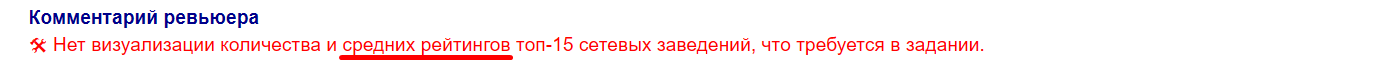

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'> Задание должно заканчиваться промежуточными выводами анализа топ-15 сетевых заведений, а не перечнем, что было сделано.</font>

<div class="alert alert-info">

Комментарий студента: Добавил визуацлизацию количества топ-15 сетевых заведений и промежуточный вывод

<div class="alert alert-info">

Комментарий студента 2: Исправил визуализацию, добавив топ-15 среднего рейтинга рядом с топ-15 количество, чтобы удобнее было сравнивать полученные результаты.

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [57]:
# Сводная статистика middle_avg_bill
rest_df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br><font color='Red'>🛠 Перед анализом необходимо отфильтровать заглушку поставленную на пропуски среднего чека при предообработке данных, так как она искажает последующий анализ.</font>
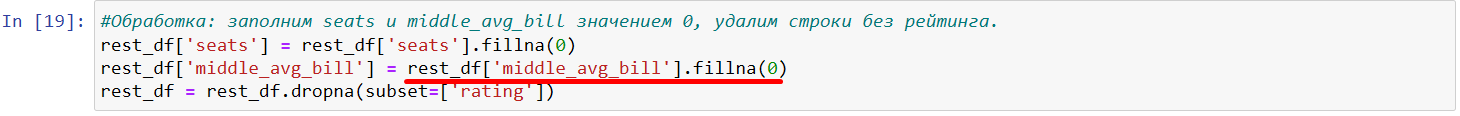

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Следовало проанализировать статистические показатели данных по среднему чеку заведений методом `.describe()`.</font><br>
<font color='Red'> Следует визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха, для оценки размаха распределения, его симметричности и наличия выбросов. Примерно вот так:</font>
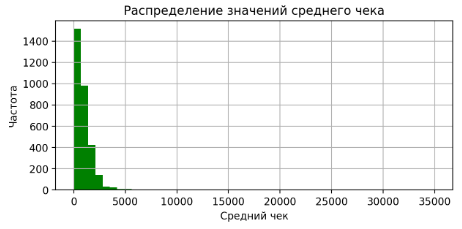
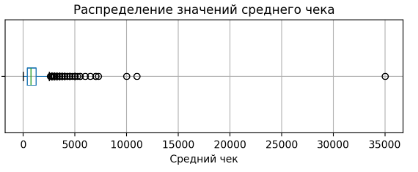

In [58]:
# Расчет средних и медиан по районам
dist_bill = (
    rest_df
    .groupby('district')['middle_avg_bill']
    .agg(mean='mean', median='median')
    .sort_values('mean', ascending=False)
    .reset_index()
)
dist_bill

,district,mean,median
0,Центральный административный округ,1191.057547,1000.0
1,Западный административный округ,1053.225490,1000.0
2,Северный административный округ,927.959627,650.0
3,Южный административный округ,834.398089,500.0
4,Северо-Западный административный округ,822.222930,700.0
5,Восточный административный округ,820.626923,575.0
6,Юго-Западный административный округ,792.561702,600.0
7,Северо-Восточный административный округ,716.611296,500.0
8,Юго-Восточный административный округ,654.097938,450.0


<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Вот же виден не корректный анализ, все медианы равны нулю.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'> Для анализа центральной тенденции среднего чека заведений по административным округам необходимо вывести и медианы, и средние значения среднего чека, примерно вот так:</font>
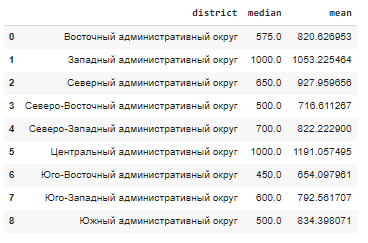

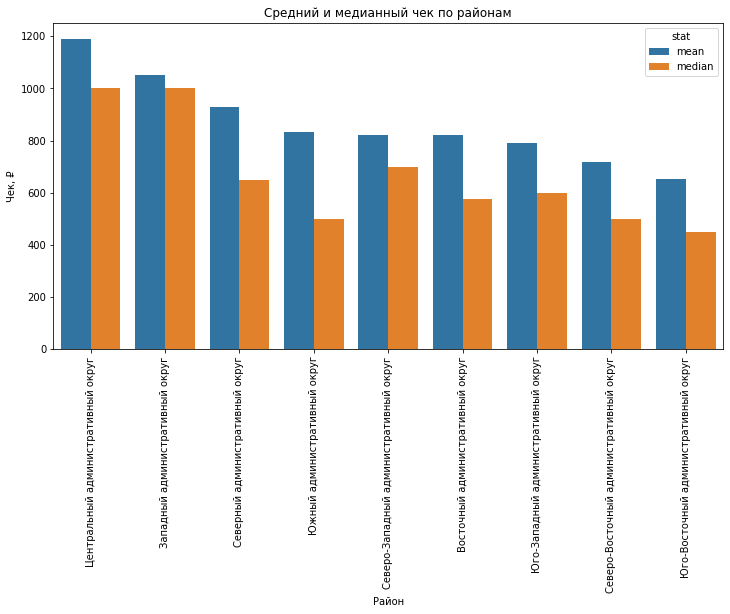

In [59]:
# Визуализация: средние и медианы по районам
df_melt = dist_bill.melt(
    id_vars='district', value_vars=['mean','median'],
    var_name='stat', value_name='check'
)
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_melt, x='district', y='check', hue='stat'
)
plt.title('Средний и медианный чек по районам')
plt.xlabel('Район')
plt.ylabel('Чек, ₽')
plt.xticks(rotation=90)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 А где медианы на диаграмме?</font>

Text(0, 0.5, 'Частота')

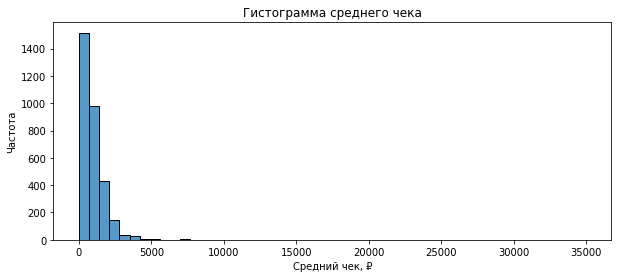

In [60]:
# Гистограмма распределения среднего чека
plt.figure(figsize=(10,4))
sns.histplot(rest_df['middle_avg_bill'].dropna(), bins=50)
plt.title('Гистограмма среднего чека')
plt.xlabel('Средний чек, ₽')
plt.ylabel('Частота')

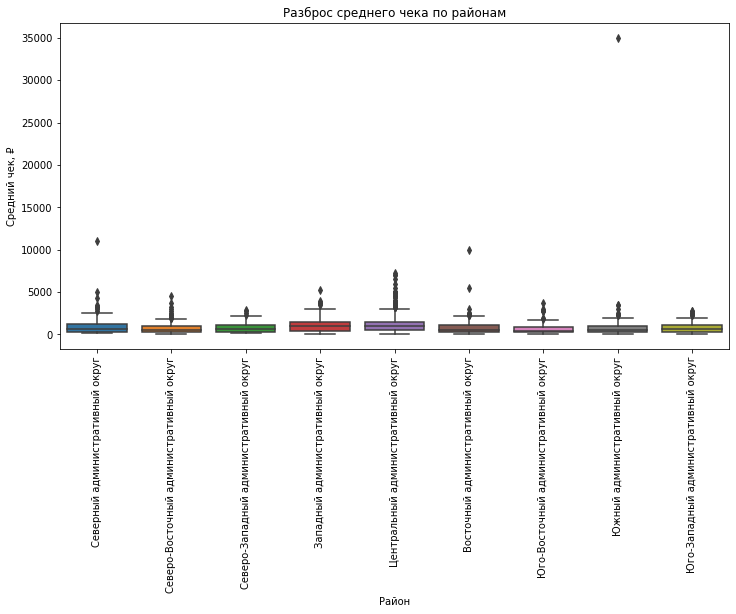

In [61]:
# Ящик с усами для оценки выбросов
plt.figure(figsize=(12,6))
sns.boxplot(data=rest_df, x='district', y='middle_avg_bill')
plt.title('Разброс среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Средний чек, ₽')
plt.xticks(rotation=90)
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Хорошо визуализированы значения среднего чека заведений по административным округам. Можно было вывести на диаграмму и медианы, и средние значения, примерно вот так:</font>
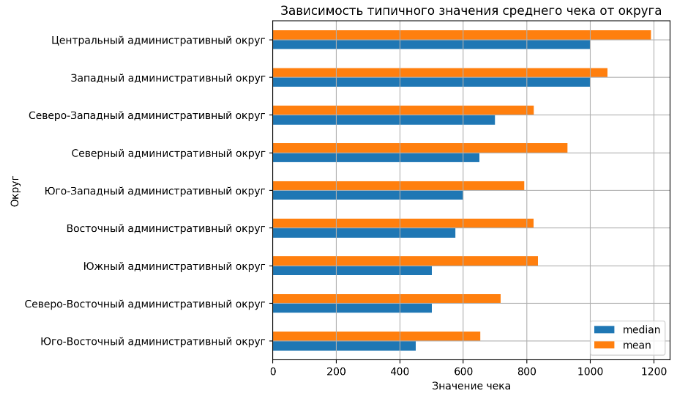

Вывод: Наблюдается тенденция того, что самые большие цены в основном в ЦАО И ЗАО, в то время как в ЮВАО И СВАО самые маленькие цены, что может нам говорить о маленьком спросе в тех районах.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Необходимо более развернуто делать промежуточный вывод: в каких округах самый высокий средний чек и чем это можно объяснить, в каких округах минимальные выбросы по среднему чеку, где самые низкие значения среднего чека и как это можно интерпретировать. </font>

<div class="alert alert-info">

Комментарий студента: Добавил гистограмму и ящик с усами для каждого региона, а также для анализа центральной тенденции среднего чека заведений по административным округам вывел и медианы и средние значения среднего чека, а также дополнил вывод.
    
P.S. Я уже понял, что ошибся на этапе предобработки данных, поэтому значения весьма отличаются от тех, что нужно, поэтому нуждаюсь в подробном объяснении:)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Все ошибки указаны в разделе предобработки данных, но они не исправлены. Объяснения необходимо получить у наставника. Ревьюер не имеет права исправлять ошибки, он может прокомментировать правильный код студента и порекомендовать более оптимальное решение. Но студент должен самостоятельно правильно решить задачу.</font>

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

- Категории заведений: доминируют кафе и рестораны(28.28% и 24.30%), а менее представлены столовые и булочные(3.75% и 3.05%)

- Районный анализ: больше всего заведений ЦАО 26,68%, а на окраинах меньше предложений(СЗАО - 4,87%)

- Сетевые заведения :доля сетевых заведений выше 50% среди булочных, пиццерий и кофейн; сетевые заведения показывают чуть более высокий средний рейтинг.

- Посадочные места: медиана ниже среднего из-за выбросов крупных залов; стоит вручную проверить экстремальные значения.

- Рейтинги: Средний рейтинг во всех заведениях примерно одинаковый, что говорит нам о популярности всех заведений, но при этом явно можно выделить бар.паб у которого рейтинг 4,39, а меньше всего у быстрого питания - 4,05

- Корреляция: сильнее всего связь между `rating` и `avg_bill` - 0,45, что может нам напрямую говорить о том, что от рейтинга заведения сильно зависит и его цена, что вполне является логичным - лучше условия и еда, значит лучше рейтинг, значит лучше средний чек.

- Топ-сети: Лидеры по количеству: «Шоколадница» (119 кофеен), «Домино’с Пицца» (76), «Додо Пицца» (74). Доминирование кофеен (6 из 15 позиций) и пиццерий (3 позиции). Рейтинги: Максимальный — «Кофемания» (4.46), минимальный — «Яндекс Лавка» (3.87).Сети с узкой специализацией («Буханка», «Кулинарная лавка») показывают высокие оценки.

- Средний чек: ЦАО — лидер по чекам, дальше САО и ЗАО; удалённость от центра коррелирует с понижением цен.

Вывод: полученные данные дают целостную картину ресторанного рынка Москвы, выявлены ключевые зависимости и зоны для дальнейшей детализации (проверка выбросов, более глубокий ценовой анализ, дополнительные факторы).

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'> Раздел исследовательского анализа данных должен заканчиваться расширенным промежуточным выводом с конкретными результатами анализа по каждому заданию.</font>

<div class="alert alert-info">

Комментарий студента: Исправил промежуточный вывод с конкретными результатами(в среднем чеке уже описал проблему)

<div class="alert alert-info">

Комментарий студента 2: Исправил промежуточный вывод на основе изменённых данных

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

### Общий обзор проделанной работы

- Объединены и предобработаны данные о заведениях и ценах: очищены дубликаты, заполнены и аргументированно обработаны пропуски, нормализованы текстовые форматы.

- Созданы дополнительные признаки: круглосуточность (is_24_7), статус сетевого заведения, числовая кодировка для категорий и районов.

- Проведён всесторонний исследовательский анализ: количественные оценки по категориям, районам, сетевому статусу, посадочным местам, рейтингу и среднему чеку.

###  Основные выводы исследования

- Разнообразие категорий: В Москве преобладают кафе и рестораны, при этом сегмент кофеен и пиццерий демонстрирует стабильный рост.

- Локационная концентрация: Центральный административный округ (ЦАО) — лидер по числу точек и среднему чеку, что указывает на высокую коммерческую привлекательность центра.

- Сетевые сети vs локальные: Сетевые заведения чаще встречаются в сегменте кофеен и имеют слегка более высокий средний рейтинг, однако абсолютное большинство составляют несетевые.

- Вместимость: Сильные выбросы по количеству мест связаны с отдельными крупными залами и могут искажать средние показатели; медиана лучше отражает типичный размер заведения.

- Рейтинг: В целом рейтинги схожи по категориям, с небольшим преимуществом у кофеен.

- Корреляции: Наиболее значимая зависимость — между средним чеком и рейтингом

- Популярные сети: Топ-15 сетей включают в основном рестораны и кофейни с устойчивым средним рейтингом, что говорит о проверенных местах.

- Ценовое позиционирование: Средний чек заметно выше в ЦАО, по мере удаления от центра наблюдается снижение цен, что важно для стратегии ценообразования и планирования новых точек.

### Рекомендации для заказчика

- Оптимизация ассортимента: Сосредоточить развитие новых форматов в сегментах, где присутствует рост (кофейни и пиццерии), учитывая предпочтения локального рынка.

- Выбор локаций: При экспансии отдавать приоритет районам с высокой покупательской способностью (ЦАО, САО), одновременно тестируя более доступные локации на периферии для диверсификации.

- Управление мощностью: При проектировании залов ориентироваться на медианные значения посадочных мест (~20–40), чтобы избежать простоя и избыточных затрат.

- Сетевое развитие: Рассмотреть стратегию франчайзинга в кофе сегменте, опираясь на положительный рейтинг сетевых точек.

- Ценообразование: Учитывать географический фактор при формировании меню и цен: более высокий чек в центре и более низкий на окраинах.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошее обобщение всего исследования. 👍</font>
<br><font color='DarkMagenta'>👉 После исправления ошибок его необходимо откорректировать.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Павел, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Исправить не обоснованное уничтожение данных в столбце диапазона средних цен. Вывести количество пропусков в относительных значениях. Сделать анализ пропусков в датасете, сделать предположения об их причинах и предложений по обработке пропусков. Исправить замену пропусков в количестве посадочных мест заведений. Переделать создание столбца с бинарным признаком ежедневной и круглосуточной работы заведения и остальных. Провести анализ количества заведений общественного питания в абсолютных и относительных значениях. Провести анализ количества заведений по административным районам в абсолютных и относительных значениях. Провести анализ количества заведений по административным районам в абсолютных и относительных значениях. Сделать выводы по анализу распределение количества заведений по административным округам. Провести анализ количества заведений по ЦАО в абсолютных и относительных значениях. Сделать промежуточные выводы анализа количества заведений по ЦАО. Переделать анализ и визуализацию категорий сетевых заведений, используя относительные значения, сделать выводы. В анализе посадочных мест необходимо отфильтровать заглушку. Сделать анализ количества посадочных мест по всем заведениям, сделать выводы. Сделать расширенные выводы по анализу посадочных мест. Сделать расширенные выводы по анализу рейтинга заведений. Переделать анализ корреляции рейтинга с другими данными по заведениям, проанализировать самую сильную связь, сделать выводы. Визуализировать средний рейтинг по топ-15 сетевых заведений. Сделать расширенные выводы по анализу рейтинга топ-15 сетевых заведений. Визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха. Сделать табличный анализ среднего чека по медиане и среднему значению по округам. Сделать развернутые выводы по анализу среднего чека заведений по административным округам. Написать выводы по разделу исследовательского анализа данных.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

<div class="alert alert-info">

Комментарий студента: Постарался исправить всё, но понимаю, что всё равно остаются недоточёты(в основном в предобработке данных), очень хотелось бы конкретных наводок, чтобы понять, что именно сделано не так. Приходилось заново ознакамливаться с полученной теорией, но всё равно нет чёткого понимания, что нужно применить. С визуализацией в целом всё понятно, комментарии везде добавил. Также понимаю, что не до конца разобрался в корреляции, но это уже надо углубляться в математику(

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='Red'>🛠 Не правильная предобработка ведет к некорректному анализу. Чем в проекте мешают пропуски, зачем их заменять заглушками? Зачем удалять значимые данные в столбце `avg_bill`?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Павел, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Исправить не обоснованное уничтожение данных в столбце диапазона средних цен. Сделать анализ пропусков в датасете, сделать предположения об их причинах и предложений по обработке пропусков. Исправить замену пропусков в количестве посадочных мест заведений. В анализе посадочных мест необходимо отфильтровать заглушку. Сделать визуализацию анализа посадочных мест по категориям заведений. Переделать анализ корреляции рейтинга с другими данными по заведениям, проанализировать самую сильную связь, сделать выводы. Визуализировать средний рейтинг по топ-15 сетевых заведений. Отфильтровать заглушку поставленную на пропуски среднего чека.<br>Надо будет проверить выводы,  при необходимости  откорректировать.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<div class="alert alert-info">

Комментарий студента 2: Вроде всё постарался переделать, надеюсь за всем уследил :) 

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 3</b></font><br><br>
<font color='DarkGreen'>👌 Павел, увы, остались еще ошибки.<br></font>
<font color='Red'>🛠 Что нужно доделать:</font><br>
<font color='Red'>🛠 Сделать анализ между рейтингом и категорией с самой сильной связью, визуализировать анализ и написать выводы.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<div class="alert alert-info">
​
Комментарий студента 3: Надеюсь исправил правильно

<font color='DarkBlue'><b>Комментарий ревьюера 4</b></font><br>
<font color='DarkMagenta'>👉 Для этого надо прочитать задание.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 4 (4-тое ревью из 6-ти возможных)</b></font><br><br>
<font color='DarkGreen'>👌 Павел, остались ошибки.<br></font>
<font color='Red'>🛠 Что нужно сделать:</font><br>
<font color='Red'>🛠 Сделать анализ между рейтингом и категорией с самой сильной связью, визуализировать анализ и написать выводы.</font><br>
<font color='DarkGreen'>👌 Жду исправленный вариант! Успехов.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 5</b></font><br><br>
<font color='DarkGreen'>👌 Павел! Удалось справиться со всеми заданиями в проекте. Молодец! 😄 Спасибо за работу!<br>
Входе выполнения проекта научились проводить исследовательский анализ данных, определять когда необходимо анализировать медианы или средние значения и визуализировать анализ. В данном проекте акцентировано внимание, что анализ проводится в целях дальнейшего принятия бизнес-решения по открытию заведения общественного питания инвестиционным фондом.</font><br>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
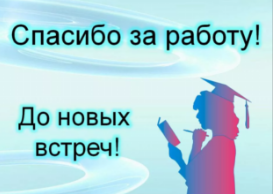